In [2]:
from sklearn import mixture
from MNE_Pipeline import MNE_Repo_Mat
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
with open('RT_dict_sub', 'rb') as file:
    RT_dict_sub = pickle.load(file)

In [5]:
RTs = np.array([])
for s in RT_dict_sub:
    for event in RT_dict_sub[s]:
        RTs = np.append(RTs, RT_dict_sub[s][event])

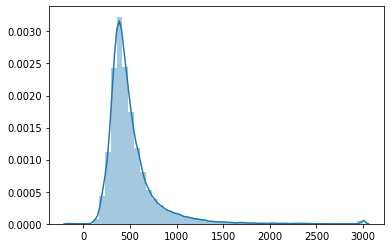

In [6]:
sns.distplot(RTs)

In [8]:
X = RTs.reshape((len(RTs), 1))

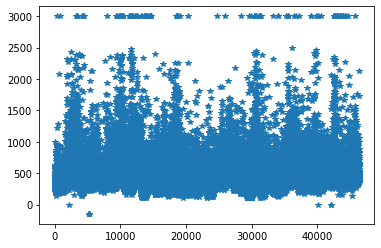

In [61]:
plt.plot(RTs, '*')

## From Rakib Vai

best point is(7,spherical)


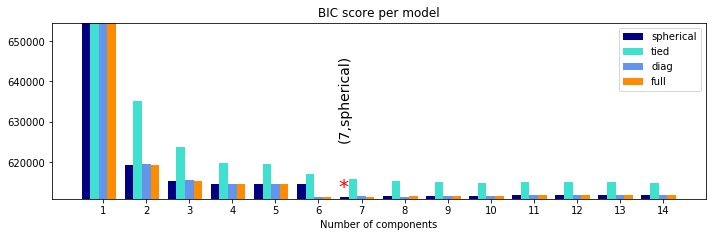

In [55]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture
# print X.shape

lowest_bic = np.infty
bic = []
n_components_range = range(1, 15)
#n_components_range = range(1, 10)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(10,6 ))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))


plt.text(xpos-.2, bic.min() * 0.97 + .03 * bic.max(),
         '*', color='red',fontsize=20)

A=[]
for cv_type in cv_types:
    for n_components in n_components_range:
        A.append([n_components,cv_type])
a="({},{})".format(A[bic.argmin()][0],A[bic.argmin()][1])
print("best point is({},{})".format(A[bic.argmin()][0],A[bic.argmin()][1]))

plt.text(xpos-.2, bic.min() * 0.97 + .05 * bic.max(),
         a, color='black',fontsize=14,rotation=90)


spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
plt.tight_layout()
#SaveImage('BNPY_Parameter')


In [48]:
BNPY=mixture.BayesianGaussianMixture(
        weight_concentration_prior_type="dirichlet_distribution",
        n_components=7, reg_covar=0, init_params='random',
        max_iter=5000, mean_precision_prior=.8,
        random_state=42,
        verbose=1,
        covariance_type='spherical',
        verbose_interval=10)
BNPY.fit(X)

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
  Iteration 110
  Iteration 120
  Iteration 130
  Iteration 140
  Iteration 150
  Iteration 160
  Iteration 170
  Iteration 180
  Iteration 190
  Iteration 200
  Iteration 210
  Iteration 220
  Iteration 230
  Iteration 240
  Iteration 250
  Iteration 260
  Iteration 270
  Iteration 280
  Iteration 290
  Iteration 300
  Iteration 310
  Iteration 320
  Iteration 330
  Iteration 340
  Iteration 350
  Iteration 360
  Iteration 370
  Iteration 380
  Iteration 390
  Iteration 400
  Iteration 410
  Iteration 420
  Iteration 430
  Iteration 440
  Iteration 450
  Iteration 460
  Iteration 470
  Iteration 480
  Iteration 490
  Iteration 500
  Iteration 510
  Iteration 520
  Iteration 530
  Iteration 540
  Iteration 550
  Iteration 560
  Iteration 570
  Iteration 580
  Iteration 590
  Iteration 600
  Iteration 610
  Iteration 620


BayesianGaussianMixture(covariance_prior=None, covariance_type='spherical',
                        degrees_of_freedom_prior=None, init_params='random',
                        max_iter=5000, mean_precision_prior=0.8,
                        mean_prior=None, n_components=7, n_init=1,
                        random_state=42, reg_covar=0, tol=0.001, verbose=1,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_distribution')

Text(0, 0.5, 'Probability')

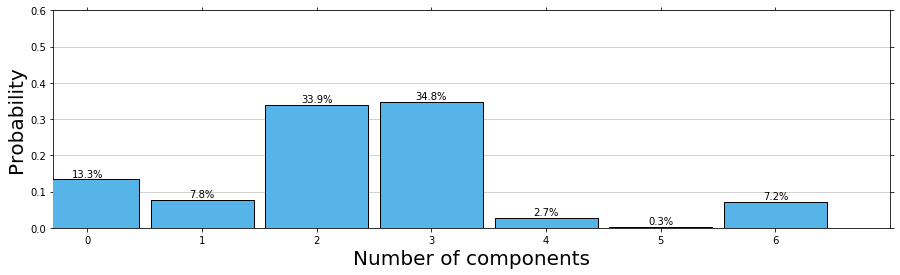

In [49]:
fig,ax2 = plt.subplots(1,1, figsize=(15,4))
n_components=7
index = np.arange(n_components)


ax2.yaxis.grid(True, alpha=0.7)
for k, w in enumerate(BNPY.weights_):
    ax2.bar(k, w, width=0.9, color='#56B4E9', zorder=3,
            align='center', edgecolor='black')
    ax2.text(k, w + 0.007, "%.1f%%" % (w * 100.),
             horizontalalignment='center')
ax2.set_xlim(-.3, n_components)
ax2.set_ylim(0., 0.6)
ax2.tick_params(axis='y', which='both', left='off',
                right='off', labelleft='off')
ax2.tick_params(axis='x', which='both', top='off')
ax2.set_xticks(range(7))
ax2.set_xlabel('Number of components',size=20)
ax2.set_ylabel('Probability',size=20)

In [51]:
preds = BNPY.predict(X)

/home/kashraf/anaconda3/envs/mne/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


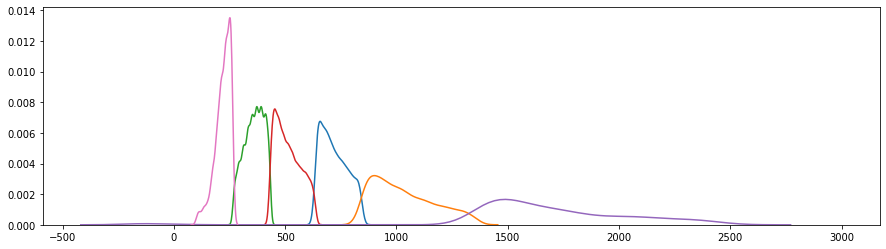

In [56]:
rts = np.array(RTs)
fig,ax = plt.subplots(1,1, figsize=(15,4))
for i in range(n_components):
    cluster = rts[[j for j in range(len(rts)) if preds[j] == i]]
    sns.distplot(cluster, rug=False, hist=False,ax = ax)
    #print('cluster {}: min - {}, max - {}, mean - {}'.format(i, cluster.min(), cluster.max(), cluster.mean()))

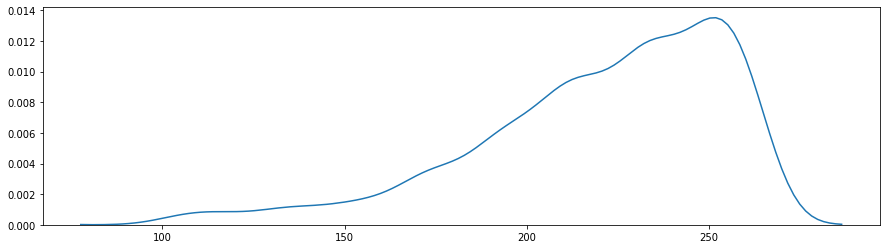

In [55]:
fig,ax = plt.subplots(1,1, figsize=(15,4))
sns.distplot(cluster, rug=False, hist=False,ax = ax)

In [47]:
cluster3.min(), cluster3.max()

(-148.0, 3000.0)

In [42]:
with open('Bayesian_GMM_RT_model.pkl', 'wb') as file:
    pickle.dump(BNPY, file)

In [43]:
with open('Bayesian_GMM_RT_model.pkl', 'rb') as file:
    gmm = pickle.load(file)

In [44]:
gmm

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='random',
                        max_iter=1500, mean_precision_prior=0.8,
                        mean_prior=None, n_components=3, n_init=1,
                        random_state=42, reg_covar=0, tol=0.001, verbose=1,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_distribution')